Jack Duggan C16350866



For the purposes of this assignment 1000 rows were used but the original dataset both had over 1/4 million rows. This may affect the outcome of the story told.

# A discovery into what makes US and German car drivers want to sell their beloved vehicles using online marketplace data!

In [1]:
library(lattice)
library(ggplot2)
require(gridExtra)

options(scipen=999999)
options(warn=-1)

Loading required package: gridExtra



In [2]:
data = read.csv("data/merged.csv")

In [3]:
head(data)
nrow(data)

,price,type,year,transmission,model,odometer,fuel,manufacturer,condition,state,lat,long,country
,<dbl>,<fct>,<int>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>
1,2238,wagon,2003,manual,corsa,77671.38,petrol,opel,good,Sachsen,51.0507,13.7366,DE
2,12000,suv,2011,manual,tiguan,93205.65,diesel,volkswagen,good,Sachsen,51.0430,13.7373,DE
3,14999,convertible,2007,manual,3er,31068.55,petrol,bmw,good,Sachsen,51.0967,13.7360,DE
4,2790,limousine,1992,manual,80,49709.68,petrol,audi,good,Sachsen,51.0210,13.7679,DE
5,6999,wagon,2009,manual,ibiza,18641.13,petrol,seat,good,Sachsen,50.8962,13.6691,DE
6,4760,other,2008,manual,andere,93205.65,diesel,peugeot,bad,Sachsen,50.9119,13.8167,DE


[1] 999

split data by country 

In [4]:
datade = subset(data, country=="DE")
dataus = subset(data, country=="US")

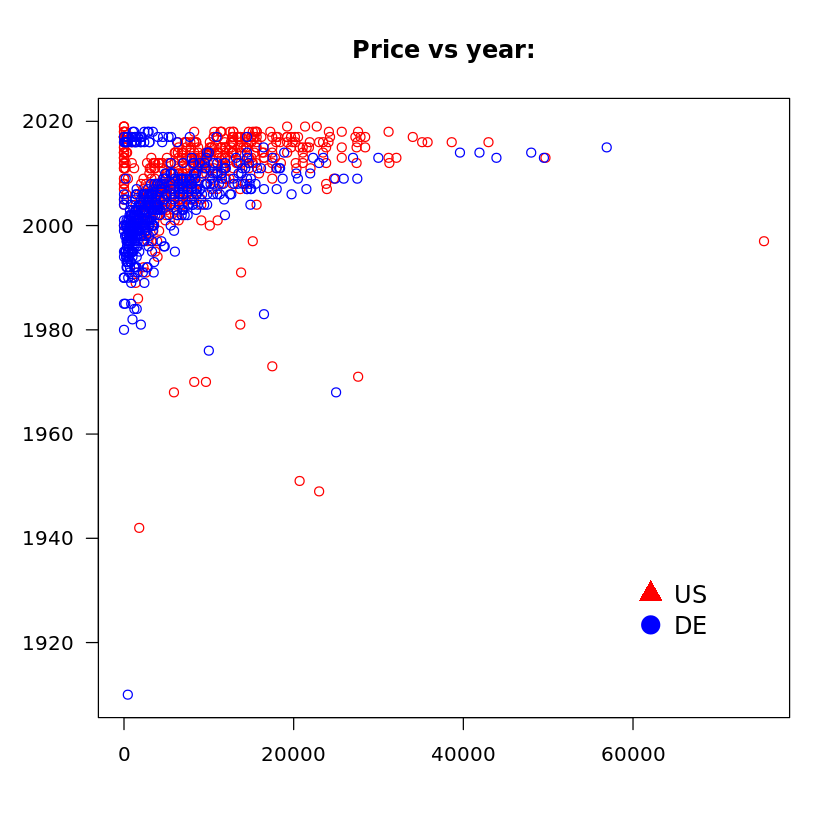

In [5]:
par(las=1)

plot(dataus$price, dataus$year, main = 'Price vs year:', 
     xlab="",ylim=c(1910,2020), ylab="", col="red", )
points(datade$price, datade$year, main = 'Price vs year:', 
     xlab="",ylim=c(1910,2020), ylab="", col="blue")

legend("bottomright", legend = c("US", "DE"), col = c("red", "blue"),
        pch = c(17,19), 
        bty = "n", pt.cex = 2, cex = 1.2, 
        text.col = "black", horiz = F , inset = c(0.1, 0.1))

From this data it can be seen that US drivers sell their cars sooner. Where as the germans wait more than eight years to sell their cars. Therfore american drivers desire the hot new thing in their vehicles but the german people grow more attached to their cars for either monitary or sentimental reasons.

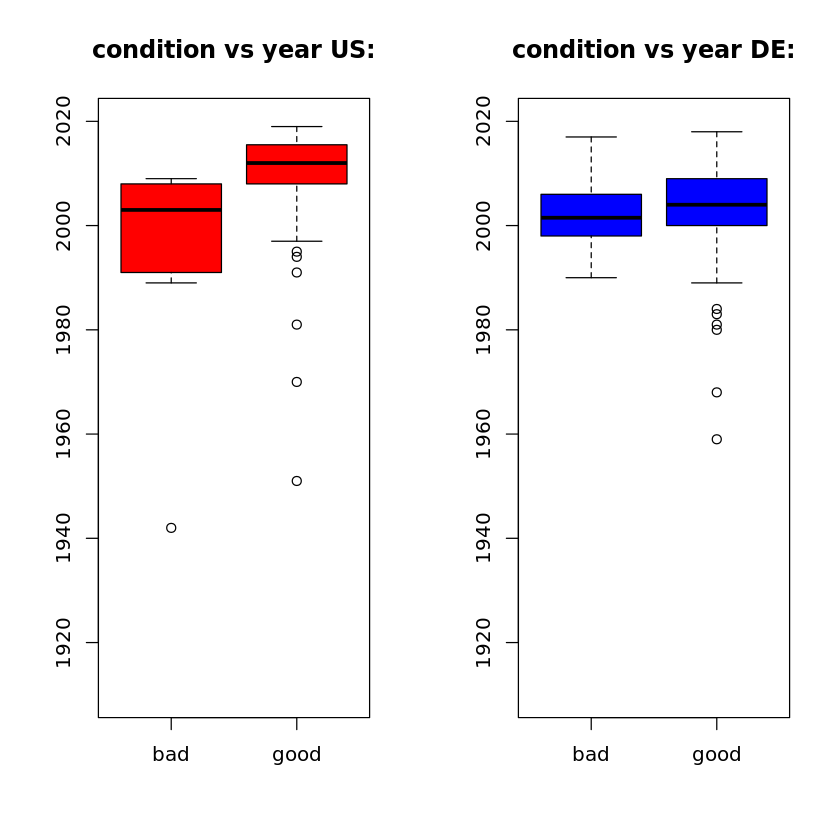

In [6]:
par(mfrow=c(1,2))
plot(dataus$condition, dataus$year, ylim=c(1910,2020), main = "condition vs year US:", col="red")
plot(datade$condition, datade$year, ylim=c(1910,2020), main = "condition vs year DE:", col="blue")

There is a clear divide between the condition of cars being sold in the US by the year of the car. 
Where as with german second hand vehicles there is a very small diffrence between good and bad condition cars by year.
This supports the findings of the previous graph. Cars being sold in the US have a clear devide because of the age of the car does not allow for much wear and tear to build up on it but as cars are being sold when they are older in germany the wear levels are mostly equal. From this data its can also be seen that germans take better care of their vehicles. 

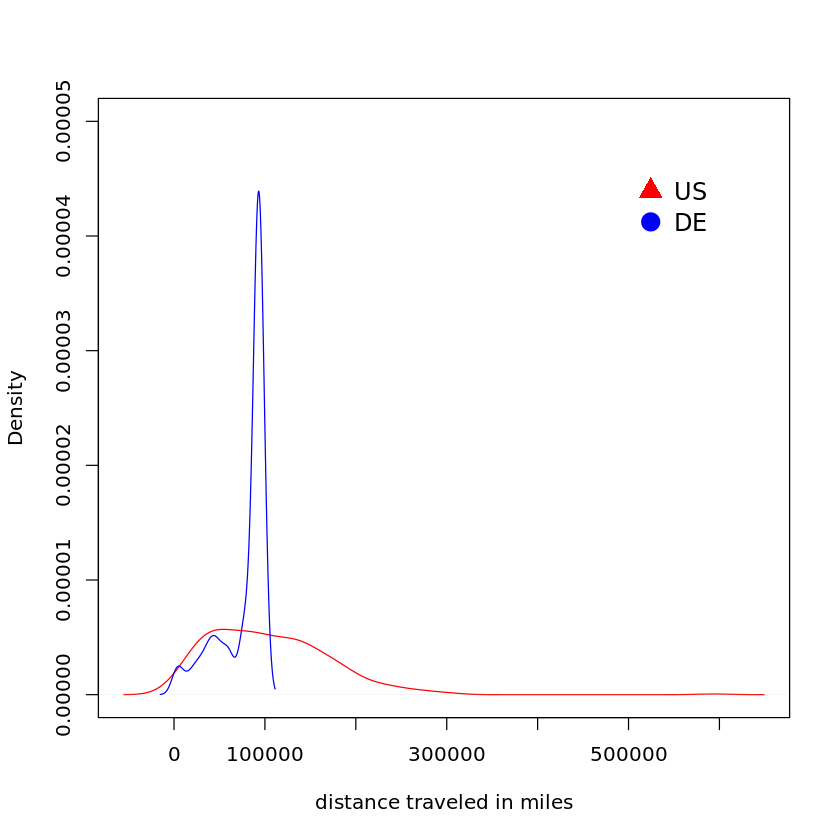

In [7]:
plot(density(na.omit(dataus$odometer)),col='red',main=NA, xlab="distance traveled in miles",ylim=c(0,.00005))
par(new=T)
lines(density(na.omit(datade$odometer)),col='blue',main=NA)
legend("topright", legend = c("US", "DE"), col = c("red", "blue"),
        pch = c(17,19), 
        bty = "n", pt.cex = 2, cex = 1.2, 
        text.col = "black", horiz = F , inset = c(0.1, 0.1))

In germany the most amount of people sell there cars when the odometer hits 100k miles.
This is not the case for US drivers who utilise there vehicle long after this point.
This may be because the american populace use there cars more regulary or have longer to trave per trip. As the car is getting utilised less this may also be a factor in why older german cars have a better condition.

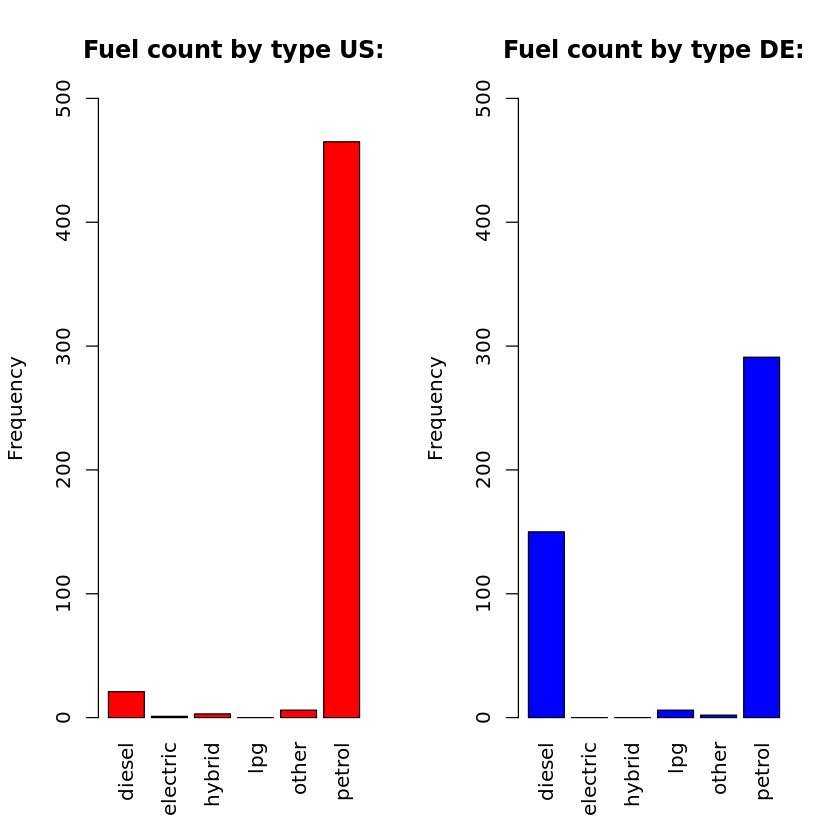

In [8]:
par(mfrow=c(1,2))
par(las=3)

plot(dataus$fuel, type="h", main = 'Fuel count by type US:', 
     ylab="Frequency",ylim=c(0,500), col="red")

plot(datade$fuel, type="h", main = 'Fuel count by type DE:',  
     ylab="Frequency",ylim=c(0,500), col="blue")

From this graph we can see diesel vehicals are more popular in germany than the US. 
While for both countries fuels that are not diesel or petrol are being sold in very low quantities.
The US has a massive want to use petrol vehicles according to this data where it does not matter to german drivers.

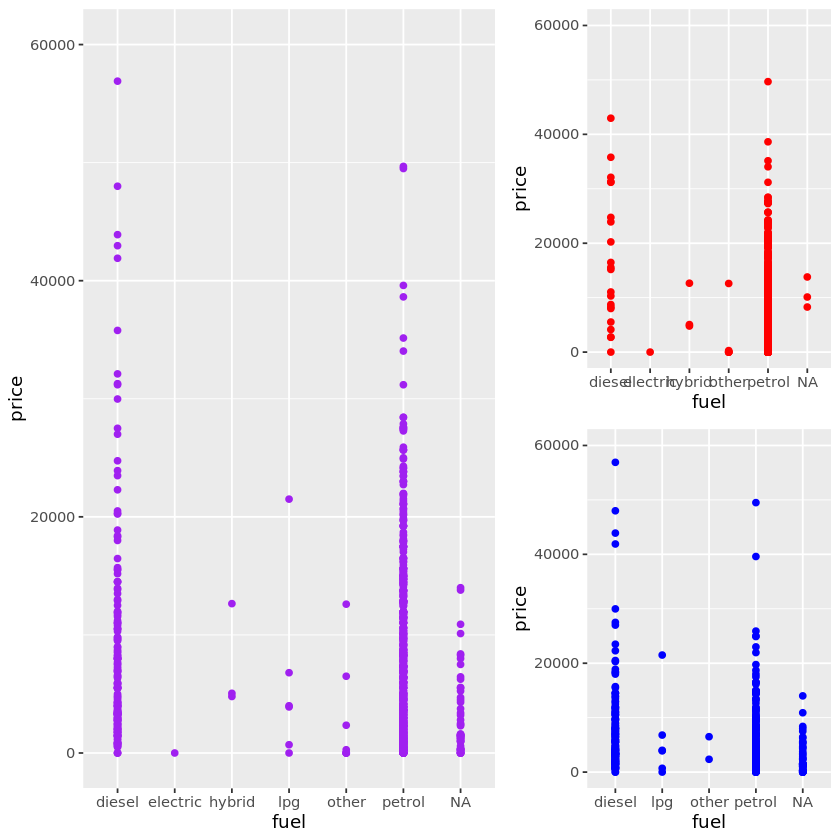

In [9]:
p = ggplot(data=data, mapping=aes(x=fuel, y=price)) + geom_point(colour = "purple") + ylim(0,60000)
p1 = ggplot(data=dataus, mapping=aes(x=fuel, y=price)) + geom_point(colour = "red") + ylim(0,60000)
p2 =ggplot(data=datade, mapping=aes(x=fuel, y=price)) + geom_point(colour = "blue") + ylim(0,60000)

lay <- rbind(c(1,1,1,2,2),
             c(1,1,1,3,3))

grid.arrange(p, p1, p2,layout_matrix = lay)

In the previous graph we saw that diesel is far more popular in germany than the US
Diesel cars cost the same amount as there petrol counterparts. Therefore the german population like diesal cars more than the US population.

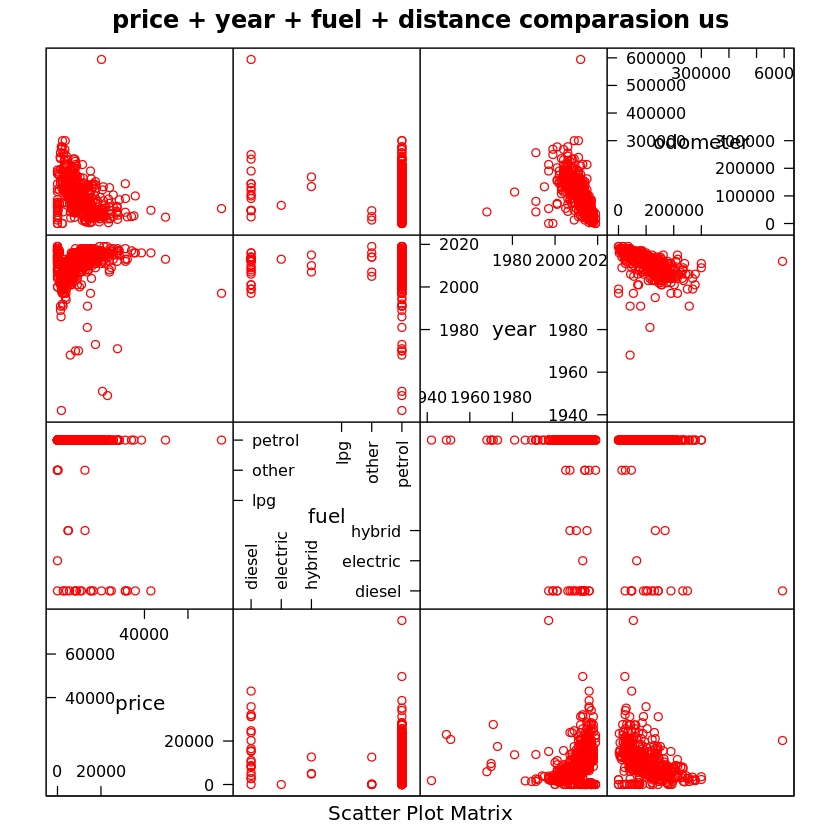

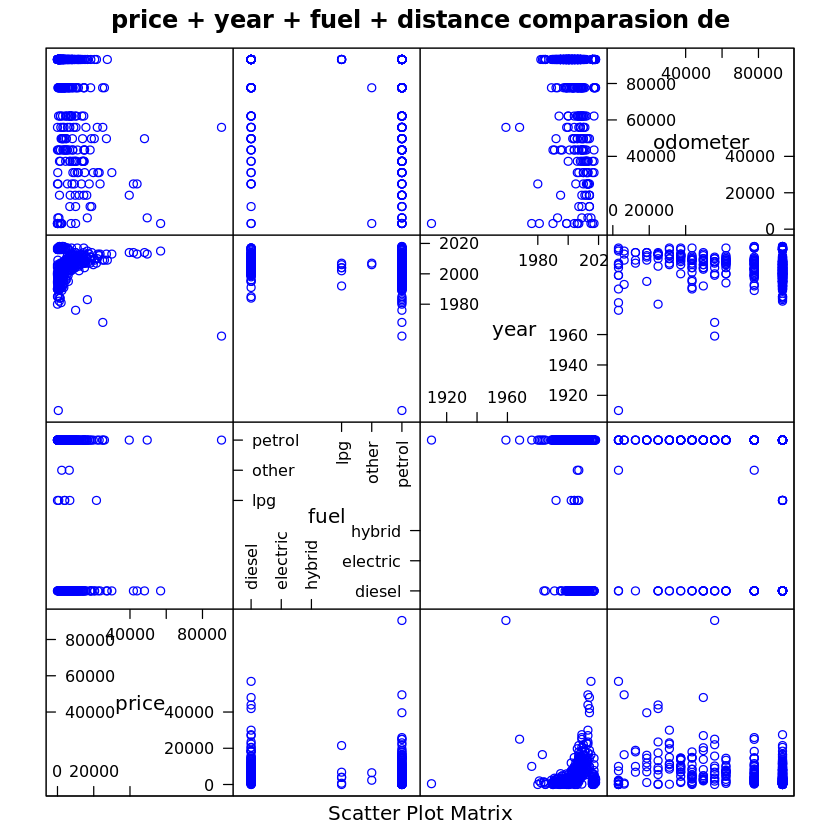

In [10]:
splom(dataus[c(1, 7, 3, 6)], main="price + year + fuel + distance comparasion us", col="red")
splom(datade[c(1, 7, 3, 6)], main="price + year + fuel + distance comparasion de", col="blue")

To bring These findings together a splom plot is utilised. A scatterplot matrix allows the graphing of everything talked about verses eachother. The difference in these graphs show the diffrence in what type of cars are sold and therfor what makes a driver from each region want to sell their vehicles.